In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spstats
import random
%matplotlib inline
import os
os.chdir('C:/data')

In [5]:
#Learning world一共有18关，每一关星星对应的分数设置
star_thresholds = {
    1: None,
    2: (920, 1000),
    3: (1100, 1900),
    4: (2000, 2800),
    5: (1000, 1500),
    6: (700, 750),
    7: (885, 1080),
    8: (850, 900),
    9: (1650, 1700),
    10: (1000, 1100),
    11: (1300, 1500),
    12: (1200, 1500),
    13: (3000, 4000),
    14: (950, 1000),
    15: (950, 1000),
    16: (1300, 1600),
    17: (970, 1000),
    18: (3800, 4200)
}

In [9]:
rows = []
research = []
#continue语句用来告诉Python跳过当前循环的剩余语句，然后继续进行下一轮循环
#append()方法用于在列表末尾添加新的对象，因为star_thresholds.keys里面只有1-18，所以如果lid不在这个范围，就加到research中
with open('stars.txt') as f:
    for line in f:
        name,team,lid,score = line.split('\t')
        team = int(team)
        lid = int(lid)
        score = int(score)
        if team < 0:
            continue
        if lid not in star_thresholds.keys():
            research.append([name, team, lid, score])
        else:
            if lid==1:
                stars = 0
            else:
                t2,t3 = star_thresholds[lid]
                stars = 3 if score >= t3 else 2 if score >= t2 else 1

            rows.append([name, team, lid, score, stars])
        
df_res = pd.DataFrame(research, columns=['username','team','lid','score'])
df = pd.DataFrame(rows, columns=['username','team','lid','score','stars'])
df.head()

,username,team,lid,score,stars
0,011i,0,1,0,0
1,011i,0,2,1003,3
2,011i,0,3,1931,3
3,011i,0,4,2896,3
4,135Mallos,0,1,0,0


C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py

C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

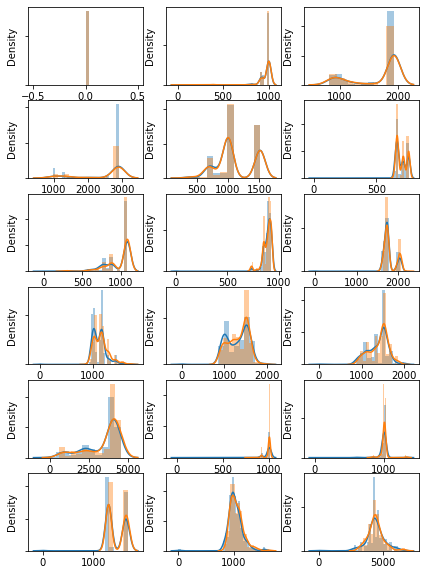

In [12]:
# stars per level... not interesting

#设置布局和画布大小
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(7,10))
#groupby的过程就是将原有的DataFrame按照groupby的字段划分为若干个分组
levels_grouped = df.groupby('lid')
#range(1,19)从1开始到19
#loc是分别取team=0和team=1的数据
#//是向下取整，%是取余数
#def用来定义一个函数
#hist是直方图，kde是核密度
for level_idx in range(1,19):
    df_level = levels_grouped.get_group(level_idx)
    score0 = list(df_level.loc[df_level['team'] == 0]['score'])
    score1 = list(df_level.loc[df_level['team'] == 1]['score'])
    
    i = level_idx-1
    ax = axes[(i//3,i%3)]
    ax.set_yticklabels([])
    
    def foo(ax, hist, kde, rug):
        sns.distplot(score0, ax=ax, hist=hist, kde=kde, rug=rug)
        sns.distplot(score1, ax=ax, hist=hist, kde=kde, rug=rug)
    foo(ax, True, True, False)

In [15]:
# extract stars and progress

#按照username分组
grouped = df.groupby('username')
#sum()方法对序列进行求和计算
stars = grouped['stars'].sum()
#进行分组
teams = grouped['team'].first()
#max()方法返回给定参数最大值
progress = grouped['lid'].max()

stars0 = []
stars1 = []
progress0 = []
progress1 = []
for name in stars.keys():
    if teams[name] == 0:
        stars0.append(stars[name])
        progress0.append(progress[name])
    else:
        stars1.append(stars[name])
        progress1.append(progress[name])

In [7]:
print(len(progress0), len(progress1)) #有921个是team=0，911个team=1
print(len(progress0) + len(progress1))

921 911
1832


In [27]:
#np.concatenate数组拼接
#np.empty()根据给定的维度和数值类型返回一个新的数组
#np.random.permutation()生成随机序列
def bs_permute(dist1, dist2, func, size):
    distboth = np.concatenate((dist1,dist2))
    
    bs_samples = np.empty(size)
    for i in range(size):
        scrambled = np.random.permutation(distboth)
        perm1 = scrambled[:len(dist1)]
        perm2 = scrambled[len(dist1):]
        bs_samples[i] = func(perm1, perm2)
        
    return bs_samples

#np.median()计算沿指定轴的中位数
def diff_meds(dist1, dist2):
    return np.median(dist1) - np.median(dist2)
    
def test_median(dist1, dist2, size):
    gtruth_dmed = diff_meds(dist1, dist2)
    sample_dmeds = bs_permute(dist1, dist2, diff_meds, size)
    
    pval = np.sum(sample_dmeds >= gtruth_dmed) / len(sample_dmeds)
    return pval

In [29]:
progress_pval = test_median(progress0, progress1, 100000)
stars_pval = test_median(stars0, stars1, 100000)
print(f'pp={progress_pval} sp={stars_pval}')
#size是1000000时，pp:0.337449,sp:0.030345;size是100000时，pp:0.33875,sp=0.03018

pp=0.33875 sp=0.03018


C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

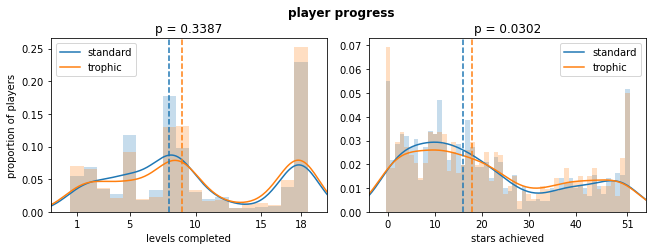

In [44]:
#plot histograms

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))
#fig.tight_layout()用于调整布局
fig.tight_layout()

# hists
pbins = np.arange(1,20)-.5
sbins = np.arange(0,53)-.5
sns.distplot(progress1, hist_kws=dict(alpha=.25), ax=axes[0], bins=pbins)
sns.distplot(progress0, hist_kws=dict(alpha=.25), ax=axes[0], bins=pbins)
sns.distplot(stars1, hist_kws=dict(alpha=.25), ax=axes[1], bins=sbins)
sns.distplot(stars0, hist_kws=dict(alpha=.25), ax=axes[1], bins=sbins)

axes[0].legend(['standard','trophic'])
axes[1].legend(['standard','trophic'])

axes[0].set_ylabel('proportion of players')
axes[0].set_xlabel('levels completed')
axes[1].set_xlabel('stars achieved')
axes[1].set_ylabel('')


# medians
#plt.get_cmap()在Matplotlib中选择颜色图
#axvline()在绘图轴上添加垂直线
cmap = plt.get_cmap('tab10')
smed0 = np.median(stars0)
smed1 = np.median(stars1)
pmed0 = np.median(progress0)
pmed1 = np.median(progress1)
axes[0].axvline(pmed0, color=cmap(.1), linestyle='--')
axes[0].axvline(pmed1, color=cmap(0), linestyle='--')
axes[1].axvline(smed0, color=cmap(.1), linestyle='--')
axes[1].axvline(smed1, color=cmap(0), linestyle='--')

# ticks
# axes[0].tick_params(axis='y', which='both', left=False, labelleft=False)
# axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axes[0].set_xlim([-1,20])
axes[1].set_xlim([-4,55])
axes[0].set_xticks([1,5,10,15,18])
axes[1].set_xticks([0,10,20,30,40,51])
axes[0].set_title(f'p = {progress_pval:.4f}')
axes[1].set_title(f'p = {stars_pval:.4f}')

plt.suptitle('player progress', fontweight='bold', y=1.08)
plt.savefig('C:/data/stars/stars.pdf', bbox_inches='tight', pad_inches=0)

C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


101 0:63995.0 1:75351.5
p0:0.9949 p1:0.0054
102 0:20001478.0 1:21026043.0


C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p0:0.8412 p1:0.1582


C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\94795\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


103 0:5010811.0 1:5005952.5
p0:0.3276 p1:0.6691


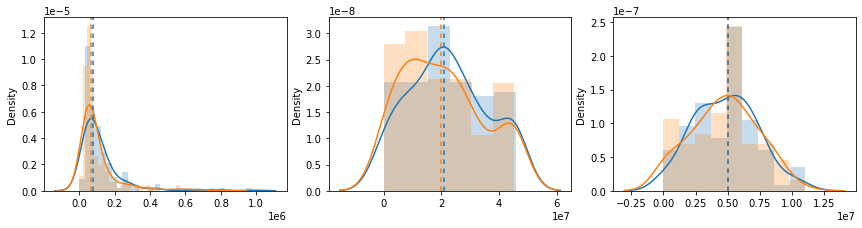

In [35]:
#还未看过
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.tight_layout()

lid_grouped = df_res.groupby('lid')
for lid in lid_grouped.groups.keys():
    df_lvl = lid_grouped.get_group(lid)#.sort_values('score', ascending=False).head(20)
    
    grouped = df_lvl.groupby('username')
    scores = grouped['score'].max()
    teams = grouped['team'].first()

    scores0 = []
    scores1 = []
    for name in scores.keys():
        if teams[name] == 0:
            scores0.append(scores[name])
        else:
            scores1.append(scores[name])
            
    ax = axes[lid-101]
    sns.distplot(scores1, hist_kws=dict(alpha=.25), ax=ax)
    sns.distplot(scores0, hist_kws=dict(alpha=.25), ax=ax)
    
    med0 = np.median(scores0)
    med1 = np.median(scores1)
    ax.axvline(med0, color=cmap(.1), ls=(0,[3,3]))
    ax.axvline(med1, color=cmap(0), ls=(0,[3,3]))

    print(f'{lid} 0:{med0} 1:{med1}')
    pval0 = test_median(scores0, scores1, 10000)
    pval1 = test_median(scores1, scores0, 10000)
    print(f'p0:{pval0} p1:{pval1}')